In [2]:
import pandas as pd

# Veri setini yükle
data_path = "C:/Users/bitir/OneDrive/Desktop/UP/UP-main/databases/2- share-of-women-in-top-income-groups.csv"
df = pd.read_csv(data_path)

# 'Code' sütununu sil
df.drop(columns=['Code'], inplace=True)

# Yeni CSV dosyasına yaz
new_data_path = "C:/Users/bitir/OneDrive/Desktop/UP/deneme/women_top_income.csv"
df.to_csv(new_data_path, index=False)

print("Veri başarıyla yeni CSV dosyasına yazıldı.")


Veri başarıyla yeni CSV dosyasına yazıldı.


In [21]:
def check_df(data_path):
    # Veriyi yükleme
    dataframe = pd.read_csv(data_path)

    print("##################### Shape #####################")
    print(dataframe.shape)
    print("##################### Types #####################")
    print(dataframe.dtypes)
    print("##################### Head #####################")
    print(dataframe.head(3))
    print("##################### Tail #####################")
    print(dataframe.tail(3))
    print("##################### NA #####################")
    print(dataframe.isnull().sum().to_frame().T.to_string(index=False))
    print("##################### Unique Entities #####################")
    print(dataframe['Entity'].unique())

# Veri çerçevesini kontrol etme
data_path = r"C:\Users\bitir\OneDrive\Desktop\UP\deneme\women_top_income.csv"
check_df(data_path)



##################### Shape #####################
(168, 8)
##################### Types #####################
Entity     object
Year        int64
0.1%      float64
0.25%     float64
0.5%      float64
1%        float64
10%       float64
5%        float64
dtype: object
##################### Head #####################
      Entity  Year  0.1%  0.25%  0.5%    1%   10%    5%
0  Australia  2000  14.2    NaN   NaN  18.3  24.9  21.1
1  Australia  2001  13.2    NaN   NaN  18.4  25.1  21.4
2  Australia  2002  13.5    NaN   NaN  18.8  25.1  21.5
##################### Tail #####################
    Entity  Year  0.1%  0.25%  0.5%    1%   10%    5%
165     UK  2013  10.8   13.3  15.6  18.0  28.0  24.6
166     UK  2014  11.4   13.9  16.3  18.6  27.7  24.8
167     UK  2015  12.7   15.3  17.1  18.9  28.3  25.1
##################### NA #####################
 Entity  Year  0.1%  0.25%  0.5%  1%  10%  5%
      0     0    37    131    86   1    0   0
##################### Unique Entities ##################

That means we need to fill th dataset with average values for each of the NA values in the datasets .It is because that theneed for corelation and see the heatmap on it.

In [42]:
import pandas as pd

# Veri setini yükle
data_path = r"C:\Users\bitir\OneDrive\Desktop\UP\deneme\women_top_income.csv"
df = pd.read_csv(data_path)

# Sadece belirli sütunlardaki ortalamaları al
columns_to_fill = ['0.1%', '0.25%', '0.5%', '1%', '10%', '5%']
means = df[columns_to_fill].mean()

# Eksik değerleri sadece belirli sütunların ortalamaları ile doldur
df[columns_to_fill] = df[columns_to_fill].fillna(means)

# Sonucu CSV olarak kaydet
output_path = r"C:\Users\bitir\OneDrive\Desktop\UP\deneme\women_top_income_filled.csv"
df.to_csv(output_path, index=False)

print("Veri başarıyla kaydedildi.")


Veri başarıyla kaydedildi.


In [44]:
def check_df(data_path):
    # Veriyi yükleme
    dataframe = pd.read_csv(data_path)

    print("##################### Shape #####################")
    print(dataframe.shape)
    print("##################### Types #####################")
    print(dataframe.dtypes)
    print("##################### Head #####################")
    print(dataframe.head(3))
    print("##################### Tail #####################")
    print(dataframe.tail(3))
    print("##################### NA #####################")
    print(dataframe.isnull().sum().to_frame().T.to_string(index=False))
    print("##################### Unique Entities #####################")
    print(dataframe['Entity'].unique())

# Veri çerçevesini kontrol etme
data_path = r"C:\Users\bitir\OneDrive\Desktop\UP\deneme\women_top_income_filled.csv"
check_df(data_path)

##################### Shape #####################
(168, 8)
##################### Types #####################
Entity     object
Year        int64
0.1%      float64
0.25%     float64
0.5%      float64
1%        float64
10%       float64
5%        float64
dtype: object
##################### Head #####################
      Entity  Year  0.1%      0.25%       0.5%    1%   10%    5%
0  Australia  2000  14.2  12.835135  14.731707  18.3  24.9  21.1
1  Australia  2001  13.2  12.835135  14.731707  18.4  25.1  21.4
2  Australia  2002  13.5  12.835135  14.731707  18.8  25.1  21.5
##################### Tail #####################
    Entity  Year  0.1%  0.25%  0.5%    1%   10%    5%
165     UK  2013  10.8   13.3  15.6  18.0  28.0  24.6
166     UK  2014  11.4   13.9  16.3  18.6  27.7  24.8
167     UK  2015  12.7   15.3  17.1  18.9  28.3  25.1
##################### NA #####################
 Entity  Year  0.1%  0.25%  0.5%  1%  10%  5%
      0     0     0      0     0   0    0   0
####################

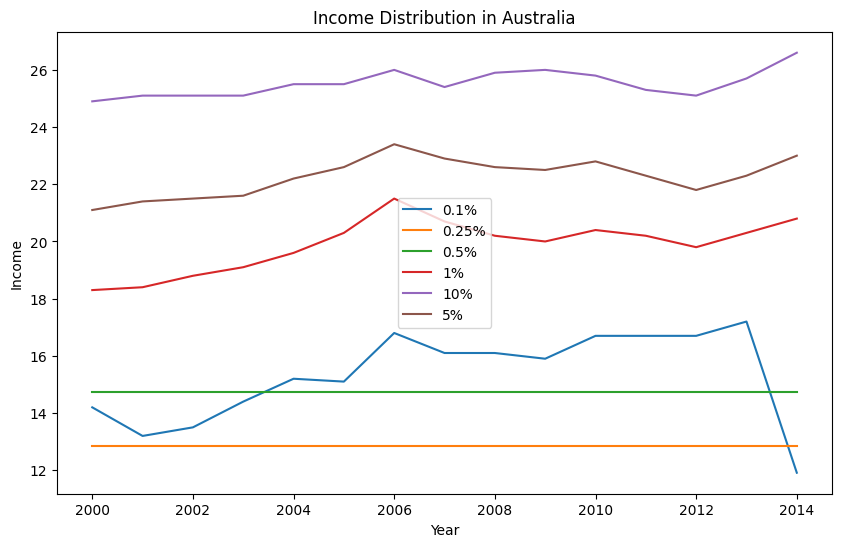

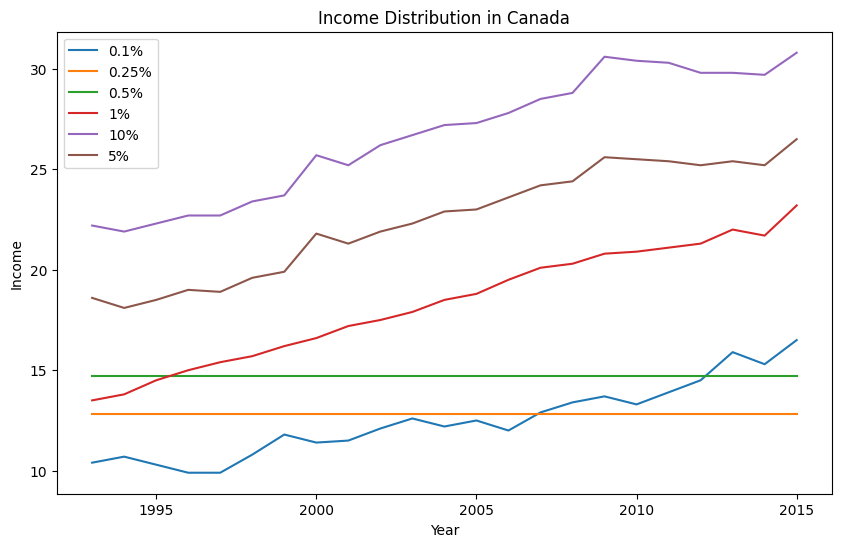

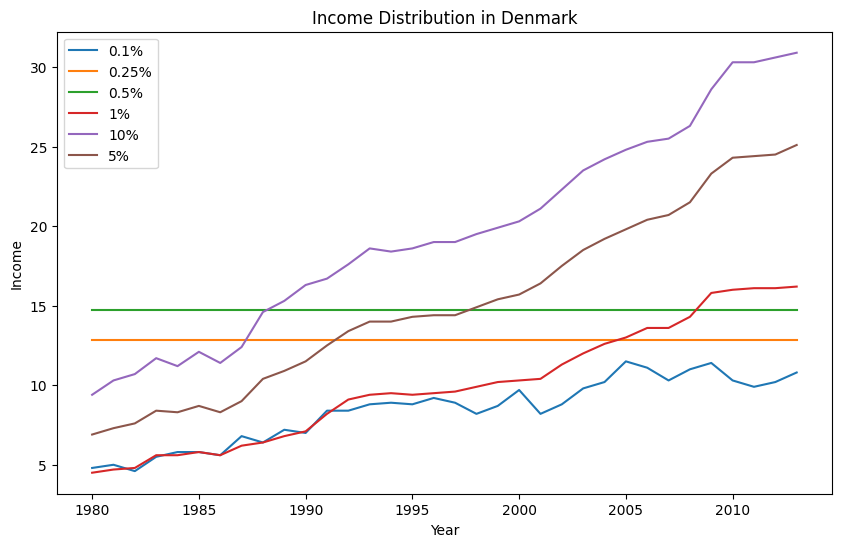

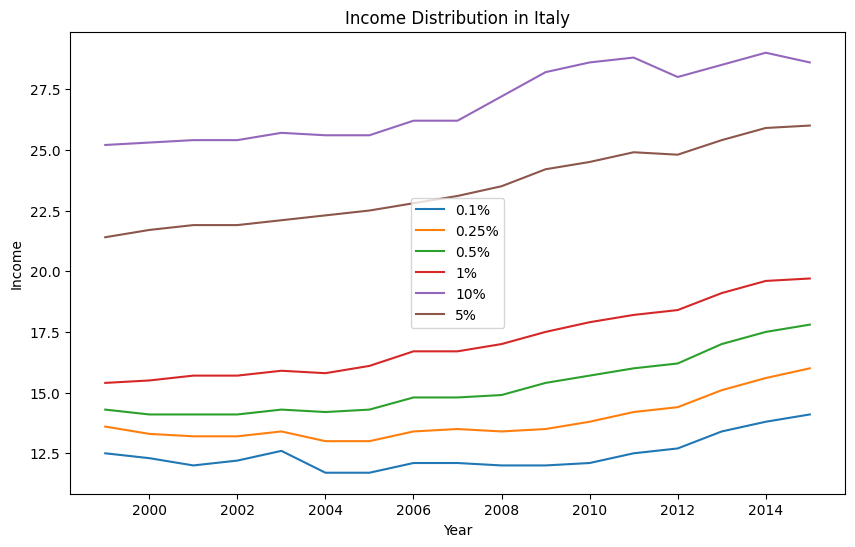

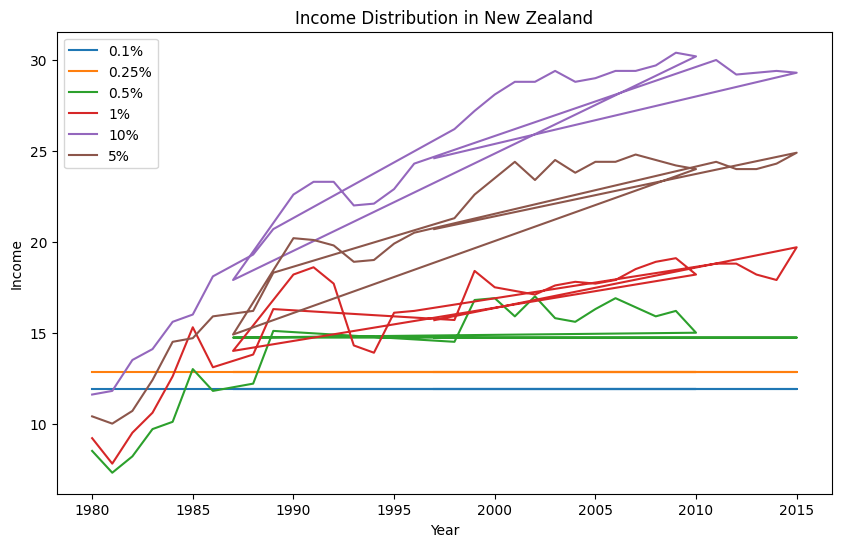

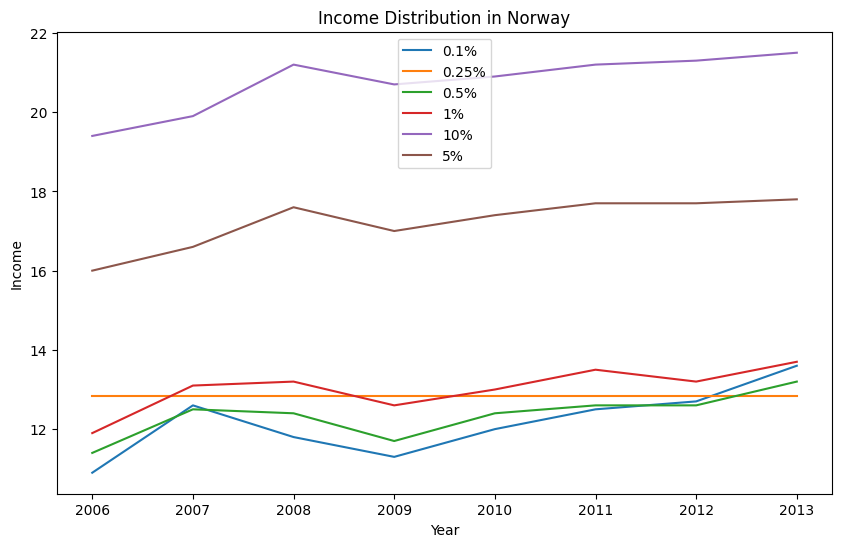

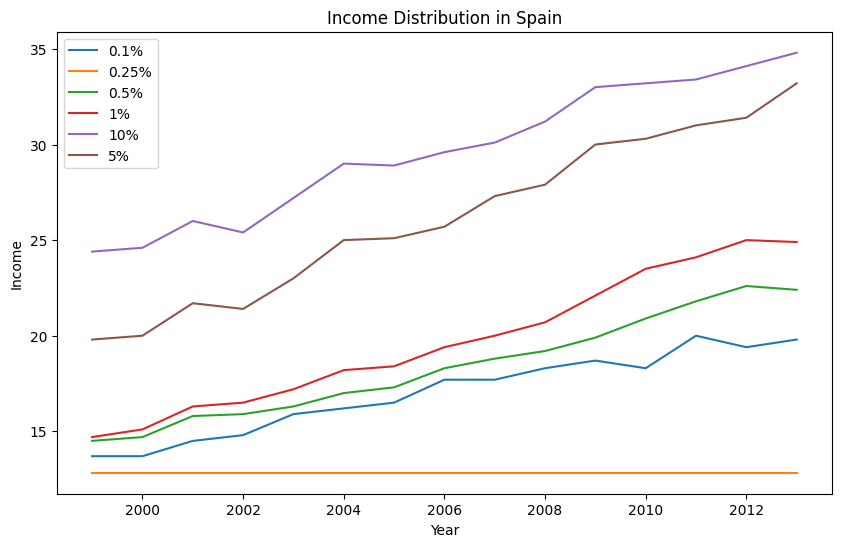

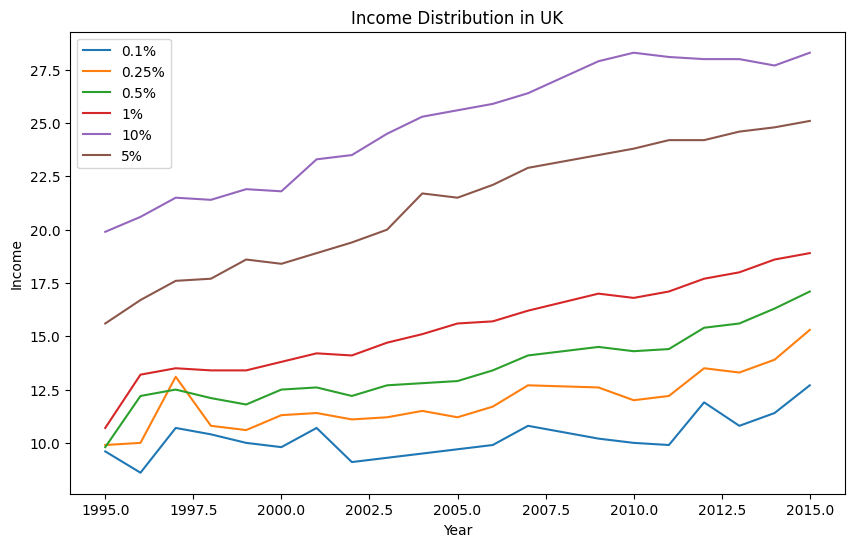

In [45]:
import pandas as pd
import matplotlib.pyplot as plt

# Veri setini yükle
data_path = "C:\\Users\\bitir\\OneDrive\\Desktop\\UP\\deneme\\women_top_income_filled.csv"
df = pd.read_csv(data_path)

# Her bir ülke için ayrı grafik oluştur
for country in df['Entity'].unique():
    country_data = df[df['Entity'] == country]
    
    # Grafik oluşturma
    plt.figure(figsize=(10, 6))
    plt.plot(country_data['Year'], country_data['0.1%'], label='0.1%')
    plt.plot(country_data['Year'], country_data['0.25%'], label='0.25%')
    plt.plot(country_data['Year'], country_data['0.5%'], label='0.5%')
    plt.plot(country_data['Year'], country_data['1%'], label='1%')
    plt.plot(country_data['Year'], country_data['10%'], label='10%')
    plt.plot(country_data['Year'], country_data['5%'], label='5%')
    
    # Grafik başlığı ve etiketler
    plt.title(f'Income Distribution in {country}')
    plt.xlabel('Year')
    plt.ylabel('Income')
    plt.legend()
    
    # Grafikleri göster
    plt.show()


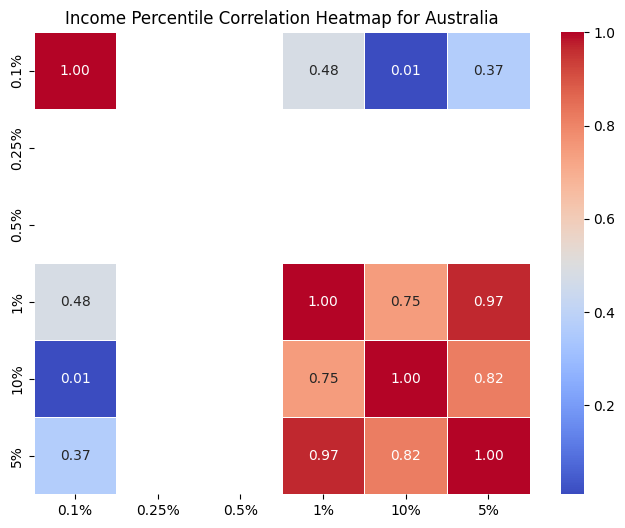

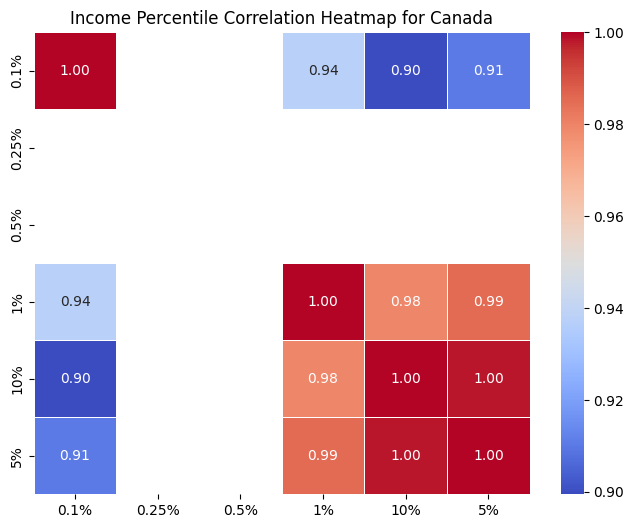

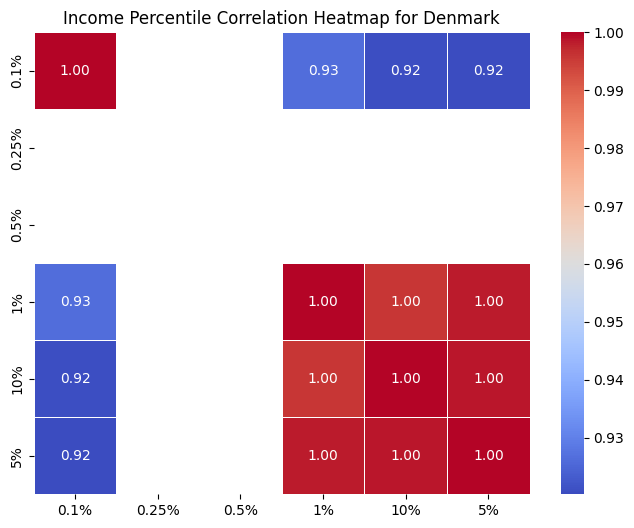

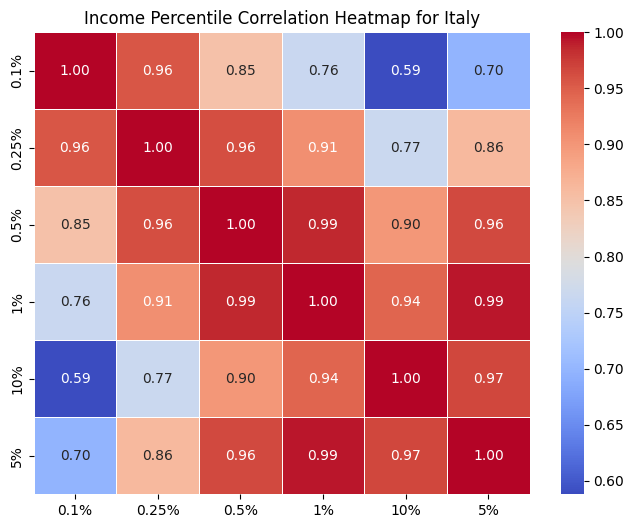

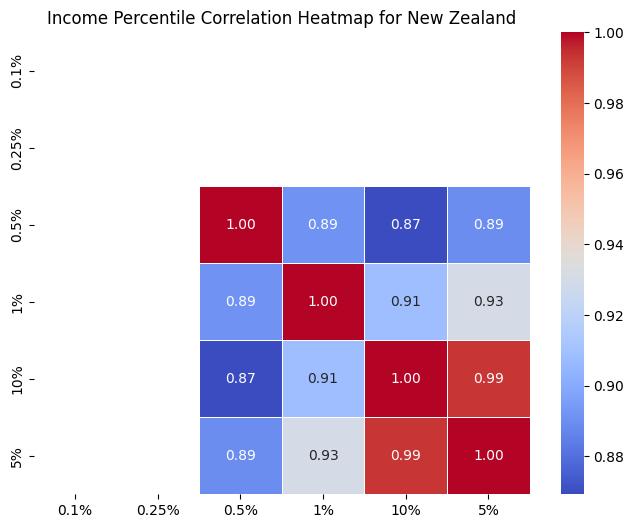

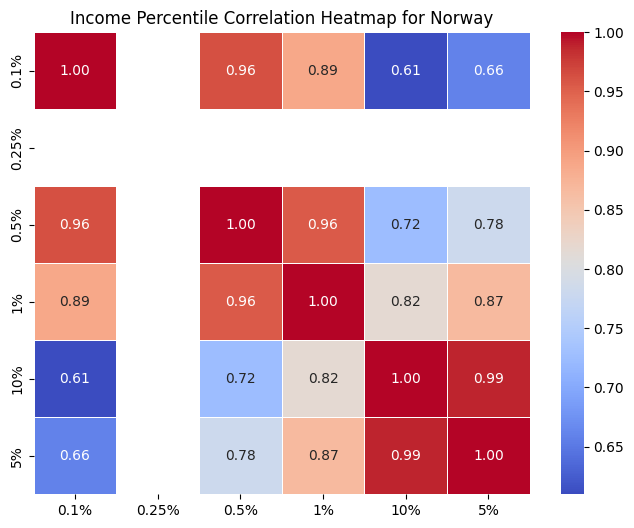

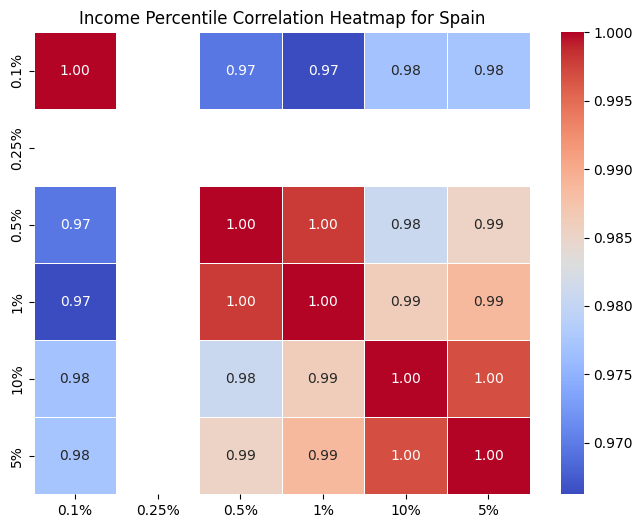

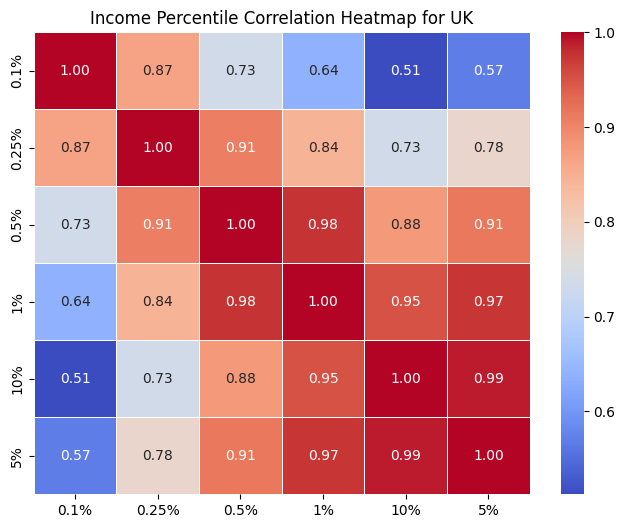

In [48]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Veri setini yükle
data_path = "C:\\Users\\bitir\\OneDrive\\Desktop\\UP\\deneme\\women_top_income_filled.csv"
df = pd.read_csv(data_path)

# Seçilen ülkeler
selected_countries = ['Australia', 'Canada', 'Denmark', 'Italy', 'New Zealand', 'Norway', 'Spain', 'UK']

# Her bir ülke için korelasyon matrisini hesapla ve heatmap'i oluştur
for country in selected_countries:
    # Seçilen ülkenin verilerini al
    country_data = df[df['Entity'] == country]
    
    # Korelasyon matrisini hesapla
    correlation_matrix = country_data[['0.1%', '0.25%', '0.5%', '1%', '10%', '5%']].corr()

    # Heatmap'i oluştur
    plt.figure(figsize=(8, 6))
    sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=.5)
    plt.title(f'Income Percentile Correlation Heatmap for {country}')
    plt.show()


In [49]:
# Her bir ülke için eksik değer sayısını kontrol et
for country in selected_countries:
    country_data = df[df['Entity'] == country]
    missing_values = country_data[['0.1%', '0.25%', '0.5%', '1%', '10%', '5%']].isnull().sum().sum()
    total_values = country_data[['0.1%', '0.25%', '0.5%', '1%', '10%', '5%']].shape[0] * 6  # Toplam hücre sayısı
    print(f"{country}: {missing_values} eksik değer / {total_values} toplam veri")


Australia: 0 eksik değer / 90 toplam veri
Canada: 0 eksik değer / 138 toplam veri
Denmark: 0 eksik değer / 204 toplam veri
Italy: 0 eksik değer / 102 toplam veri
New Zealand: 0 eksik değer / 216 toplam veri
Norway: 0 eksik değer / 48 toplam veri
Spain: 0 eksik değer / 90 toplam veri
UK: 0 eksik değer / 120 toplam veri


Eğer herhangi bir eksik değer bulunmuyorsa ve korelasyon çıkmıyorsa, muhtemelen seçilen değişkenler arasında yeterince değişkenlik olmamaktadır. Korelasyon, değişkenler arasındaki ilişkinin varlığını ölçer; ancak değişkenler arasında düşük bir değişkenlik varsa veya değişkenlikler arasında doğrusal bir ilişki yoksa korelasyon düşük veya sıfır olabilir.

Bu durumda, seçilen değişkenlerin dağılımlarını görselleştirerek ve belki de farklı değişkenler seçerek korelasyon analizini yeniden değerlendirmek faydalı olabilir. Ayrıca, belirli bir ülke için korelasyon hesaplanırken diğer ülkelerin de dikkate alınması gerektiğini unutmamak önemlidir. Korelasyon, genellikle farklı ülkelerin gelir dağılımları arasındaki benzerlik veya farklılıkları ölçmek için kullanıldığında daha anlamlı olabilir.


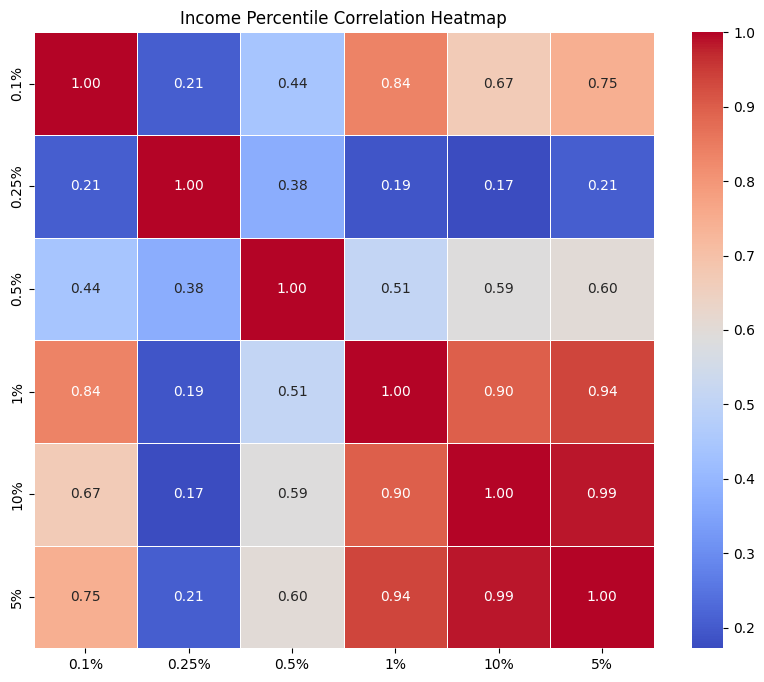

In [46]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Veri setini yükle
data_path = "C:\\Users\\bitir\\OneDrive\\Desktop\\UP\\deneme\\women_top_income_filled.csv"
df = pd.read_csv(data_path)

# Ülkeleri seç
selected_countries = ['Australia', 'Canada', 'Denmark', 'Italy', 'New Zealand', 'Norway', 'Spain', 'UK']

# Seçilen ülkelerin verilerini al
selected_data = df[df['Entity'].isin(selected_countries)]

# Korelasyon matrisini hesapla
correlation_matrix = selected_data[['0.1%', '0.25%', '0.5%', '1%', '10%', '5%']].corr()

# Heatmap'i oluştur
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=.5)
plt.title('Income Percentile Correlation Heatmap')
plt.show()


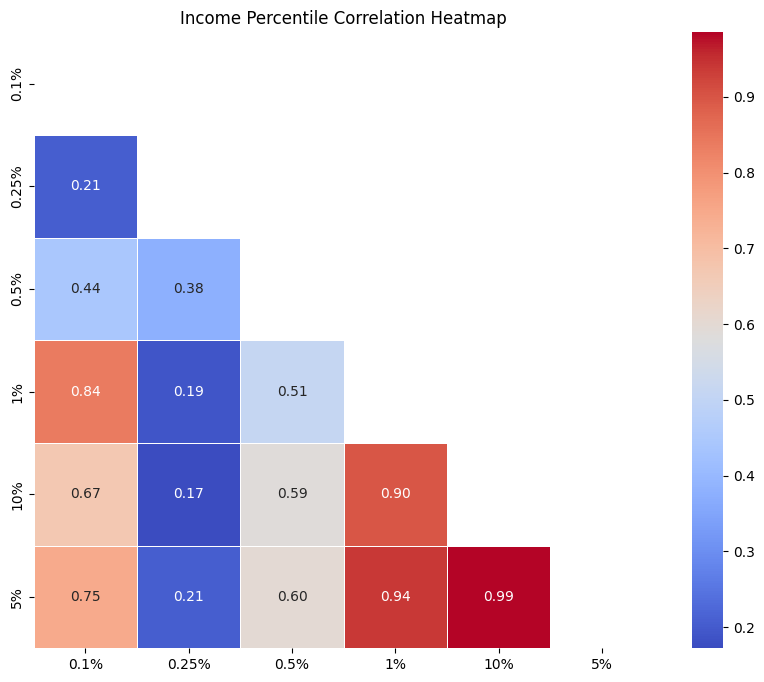

In [47]:
import numpy as np

# Korelasyon matrisini hesapla
correlation_matrix = selected_data[['0.1%', '0.25%', '0.5%', '1%', '10%', '5%']].corr()

# Köşegenin altındaki verileri eler
mask = np.triu(np.ones_like(correlation_matrix, dtype=bool))

# Heatmap'i oluştur
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=.5, mask=mask)
plt.title('Income Percentile Correlation Heatmap')
plt.show()


bir de her ülkenin değerini 15 den 1 e indirerek ve bunun ortlaamsını alarak korelasyon oluşturmak istiyorum ki hangi değerimin daha iyi olduğunu görmek istiyorum.Buna göre model eğitirken kullanmak istiyorum.

In [52]:
import pandas as pd

# CSV dosyasını yükle
file_path = r'C:\Users\bitir\OneDrive\Desktop\UP\deneme\women_top_income_filled.csv'
df = pd.read_csv(file_path)

# 'Year' sütununu kaldır
df.drop(columns=['Year'], inplace=True)

# Yeni dosyayı oluştur
new_file_path = r'C:\Users\bitir\OneDrive\Desktop\UP\deneme\women_top_income_easy.csv'
df.to_csv(new_file_path, index=False)

print("Yeni dosya oluşturuldu:", new_file_path)


Yeni dosya oluşturuldu: C:\Users\bitir\OneDrive\Desktop\UP\deneme\women_top_income_easy.csv


In [53]:
import pandas as pd

# CSV dosyasını yükle
file_path = r'C:\Users\bitir\OneDrive\Desktop\UP\deneme\women_top_income_easy.csv'
df = pd.read_csv(file_path)

# 'Entity' değerlerine göre 8 gruba ayır
groups = {
    'Australia', 'Canada', 'Denmark', 'Italy',
    'New Zealand', 'Norway', 'Spain', 'UK'
}

# Her gruptaki değerlerin her bir yüzdelik dilime göre ortalamasını al
avg_values = {}
for group in groups:
    group_data = df[df['Entity'] == group].drop(columns=['Entity'])
    avg_values[group] = group_data.mean()

# Yeni ortalamaları içeren bir DataFrame oluştur
new_df = pd.DataFrame(avg_values).transpose().reset_index()
new_df.rename(columns={'index': 'Entity'}, inplace=True)

# Önceki içeriği silerek yeni çıktıyı kaydet
df.iloc[0:0].to_csv(file_path, index=False)  # İlk önce içeriği sil
new_df.to_csv(file_path, mode='a', index=False, header=True)  # Yeni çıktıyı ekle

print("Yeni çıktı başarıyla kaydedildi:", file_path)


Yeni çıktı başarıyla kaydedildi: C:\Users\bitir\OneDrive\Desktop\UP\deneme\women_top_income_easy.csv


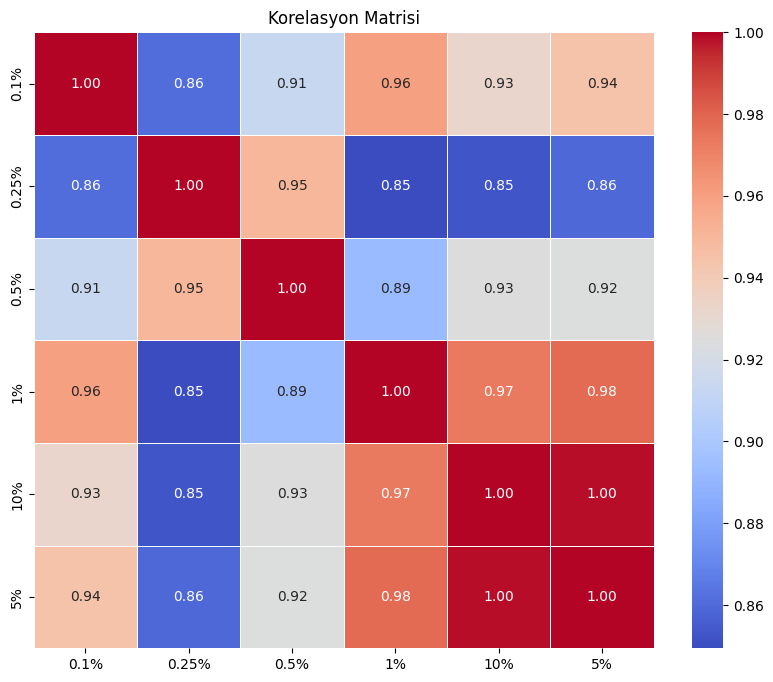

In [59]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# CSV dosyasından verileri yükle
file_path = r'C:\Users\bitir\OneDrive\Desktop\UP\deneme\women_top_income_easy.csv'
data = pd.read_csv(file_path)

# 'Entity' sütununu veri çerçevesinden çıkar
data_numeric = data.drop(columns=['Entity'])

# Yüzdelik değerleri sayısal formata dönüştür
for column in data_numeric.columns:
    data_numeric[column] = data_numeric[column].str.rstrip('%').astype(float)

# Korelasyon matrisini oluştur
corr_matrix = data_numeric.corr()

# Korelasyon matrisini görselleştir
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title('Korelasyon Matrisi')
plt.show()


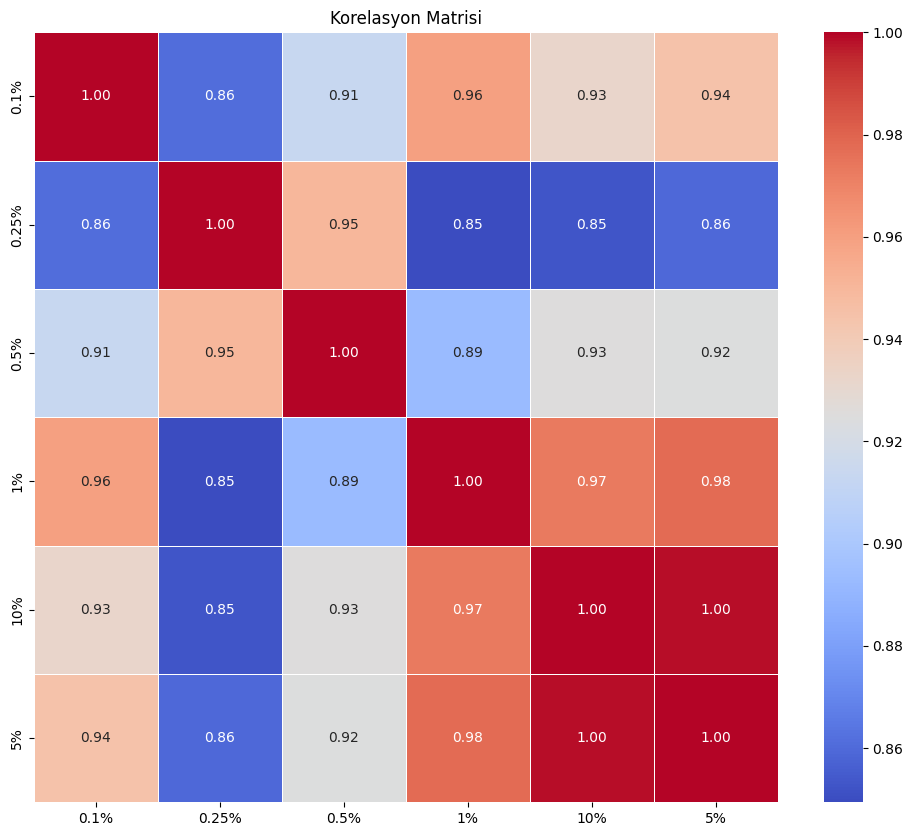

C:\Users\bitir\AppData\Local\Temp\ipykernel_17384\2960347308.py:27: FutureWarning: The geopandas.dataset module is deprecated and will be removed in GeoPandas 1.0. You can get the original 'naturalearth_lowres' data from https://www.naturalearthdata.com/downloads/110m-cultural-vectors/.
  world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))


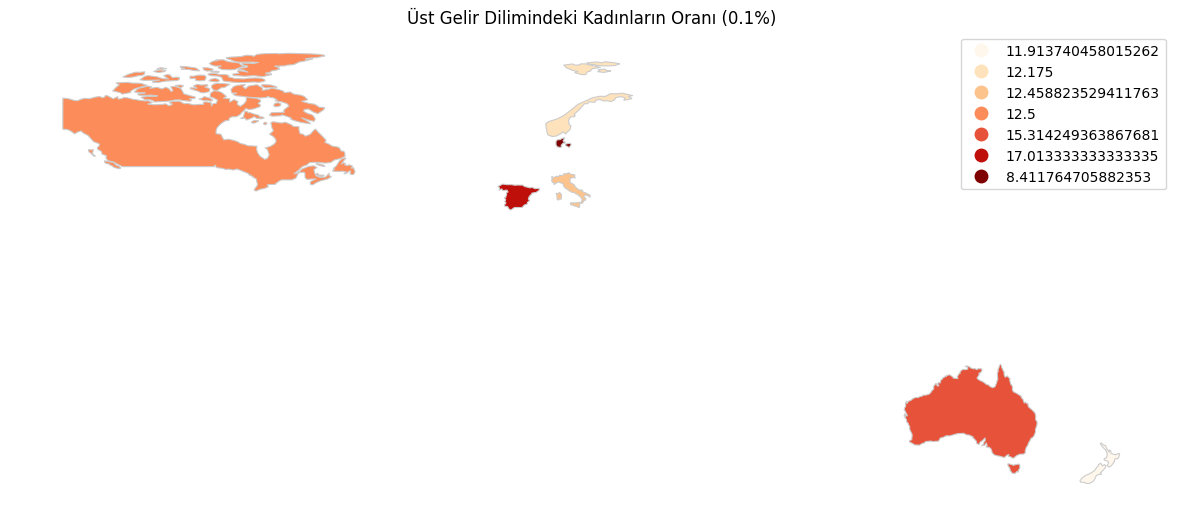

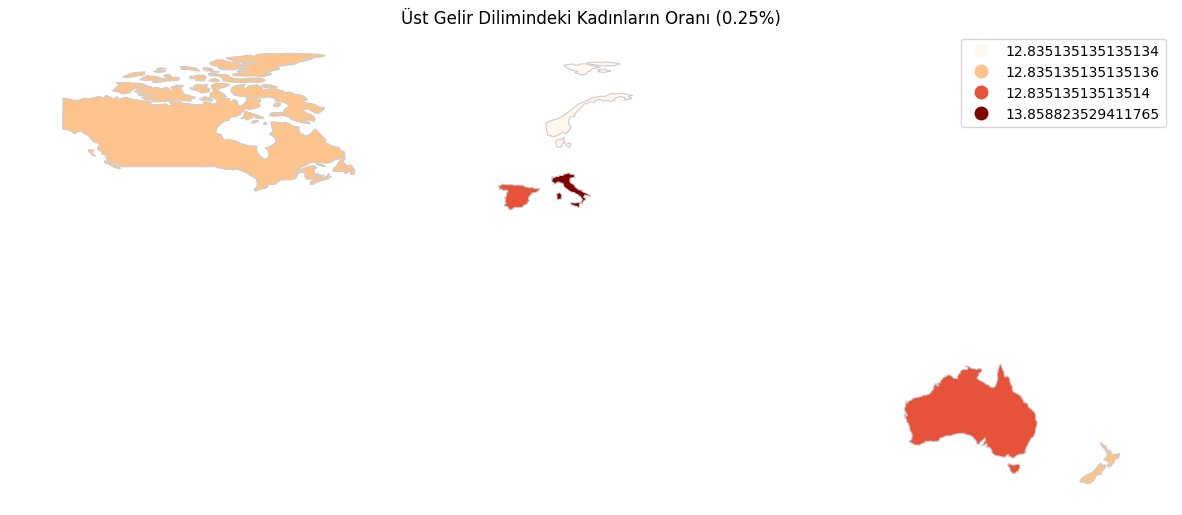

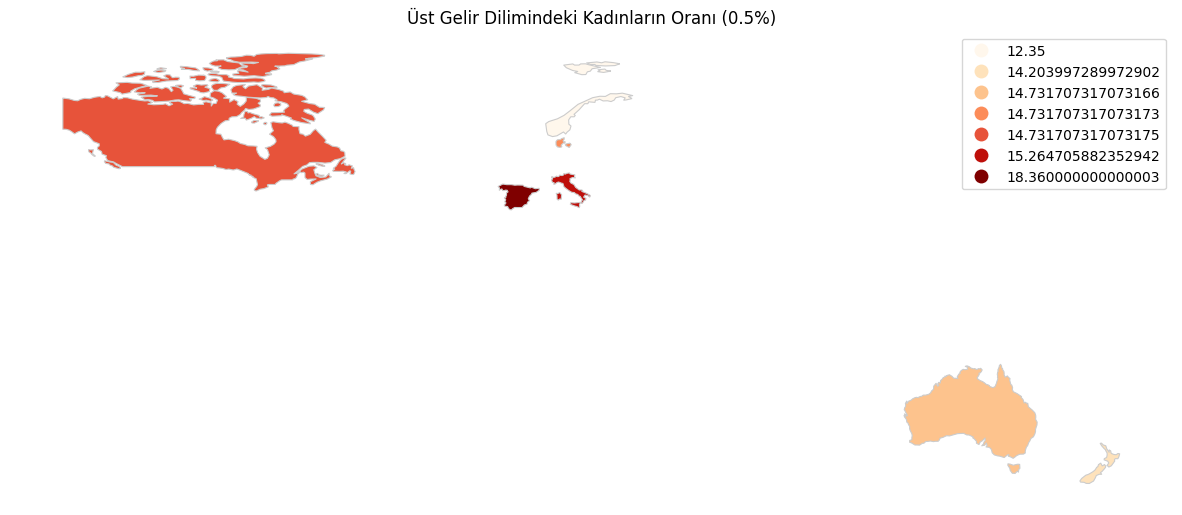

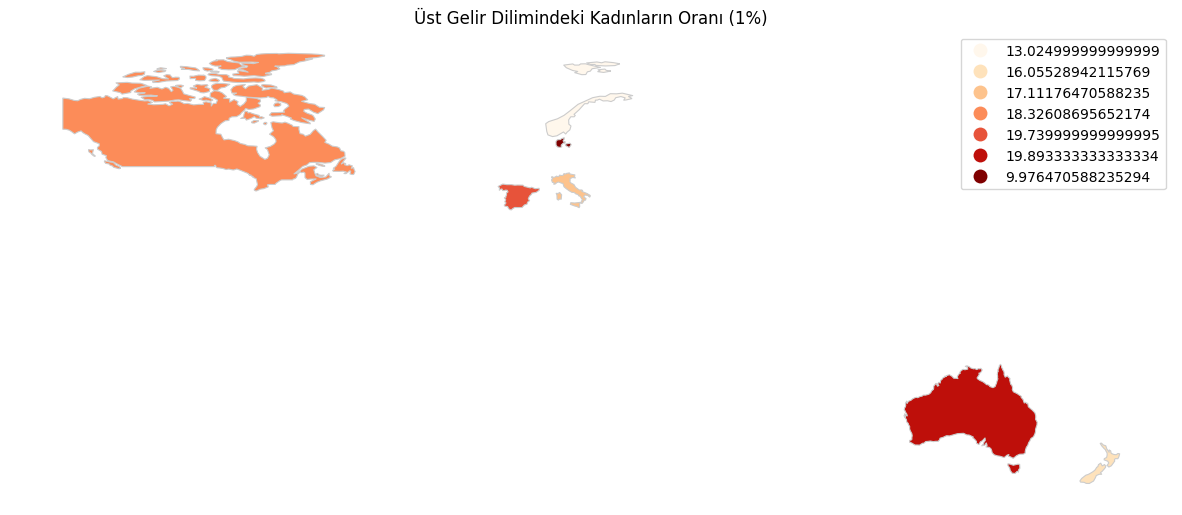

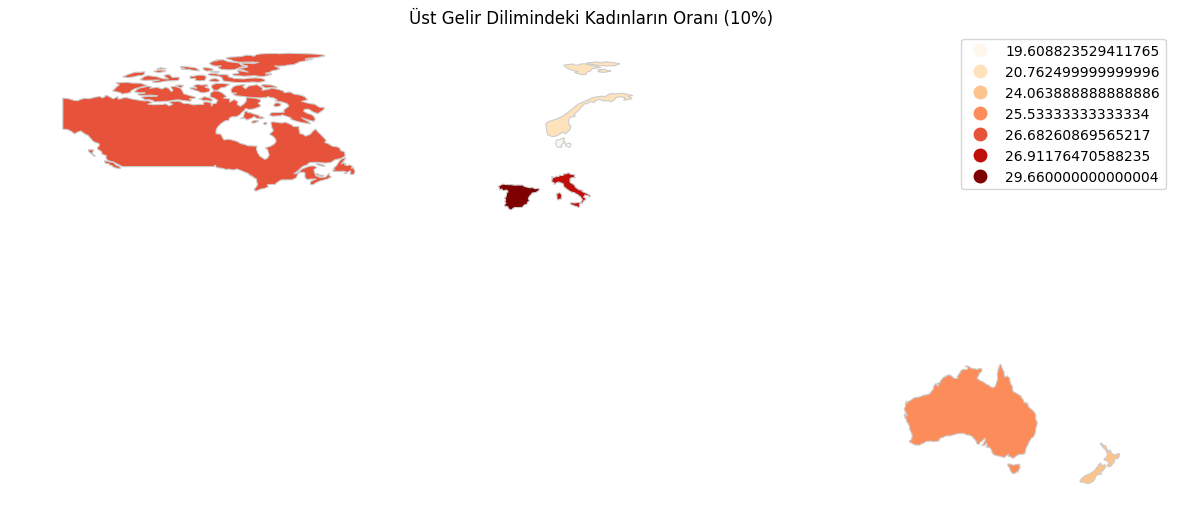

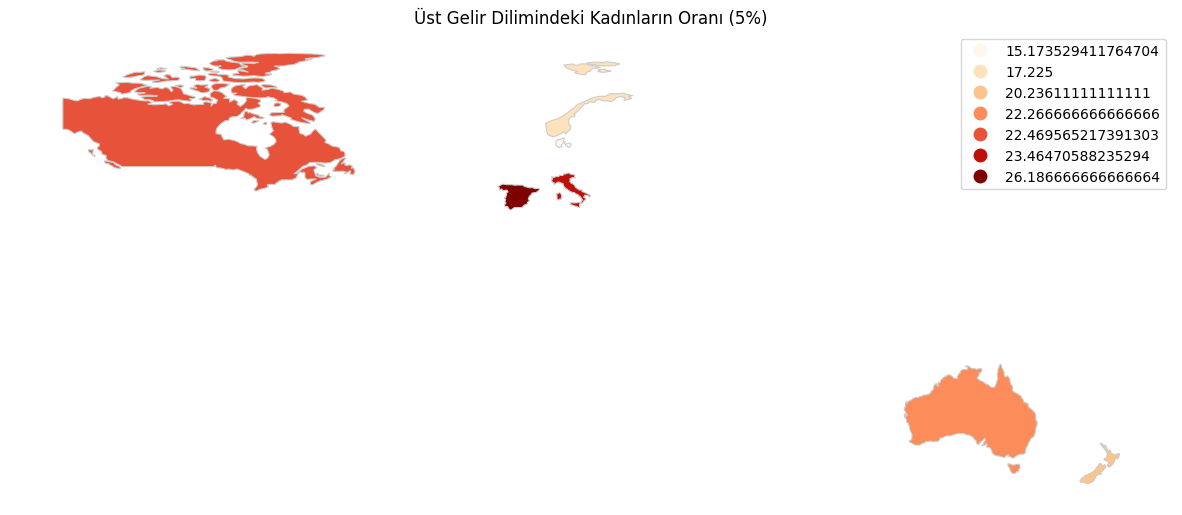

In [62]:
import geopandas as gpd
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Veri setini yükle
file_path = r'C:\Users\bitir\OneDrive\Desktop\UP\deneme\women_top_income_easy.csv'
data = pd.read_csv(file_path)

# 'Entity' sütununu veri çerçevesinden çıkar
data_numeric = data.drop(columns=['Entity'])

# Yüzdelik değerleri sayısal formata dönüştür
for column in data_numeric.columns:
    data_numeric[column] = data_numeric[column].str.rstrip('%').astype(float)

# Korelasyon matrisini oluştur
corr_matrix = data_numeric.corr()

# Korelasyon matrisini görselleştir
plt.figure(figsize=(12, 10))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title('Korelasyon Matrisi')
plt.show()

# Ülkelerin coğrafi kodlarını içeren harita veri setini yükle
world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))

# Yüzdelik dilimler için görselleştirme
for column in data_numeric.columns:
    # Harita veri seti ile veri setini birleştir
    merged = world.set_index('name').join(data.set_index('Entity'))

    # Görselleştirme
    fig, ax = plt.subplots(1, 1, figsize=(15, 10))
    merged.plot(column=column, cmap='OrRd', linewidth=0.8, ax=ax, edgecolor='0.8', legend=True)
    ax.axis('off')
    plt.title(f'Üst Gelir Dilimindeki Kadınların Oranı ({column})')
    plt.show()
